In [4]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
%matplotlib inline


In [5]:
%pwd
path = 'D:\\Python\\DataScience\\DataScience6105\\Module5'
trn_df = pd.read_csv(f'{path}/titanic_trn_4_ml.csv')
test_df = pd.read_csv(f'{path}/titanic_test_4_ml.csv')
print(trn_df.shape)
print(test_df.shape)


(1100, 13)
(209, 13)


In [10]:
x_train = trn_df.drop('Survived', axis = 1)
y_train = trn_df['Survived']
x_test = test_df.drop('Survived', axis = 1)
y_test = test_df['Survived']

knn_model = KNeighborsClassifier()

param = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1, 16)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1, 16)],
        'p':[i for i in range(1, 6)]
    },
    {
        
    }
'''{
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1, 16)],
        'algorithm':['auto'],
        'leaf_size':[i for i in range(15, 46)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1, 16)],
        'p':[i for i in range(1, 6)]
        'algorithm':['auto'],
        'leaf_size':[i for i in range(15, 46)]
    }
]'''
grid_search = GridSearchCV(knn_model, param, n_jobs=1, verbose=2)

%time
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)
print(grid_search.best_score_)


Wall time: 0 ns
Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................

C:\Users\Zhou\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    6.5s finished


In [15]:
knn_model_fit = grid_search.best_estimator_
y_pred = knn_model_fit.predict(x_train)
print(accuracy_score(y_train, y_pred))
y_pred_test = knn_model_fit.predict(x_test)
print(accuracy_score(y_test, y_pred_test))


0.6854545454545454
0.5645933014354066


                0   1
Not survived  118  91
Survived        0   0


Text(51.0, 0.5, 'predicted')

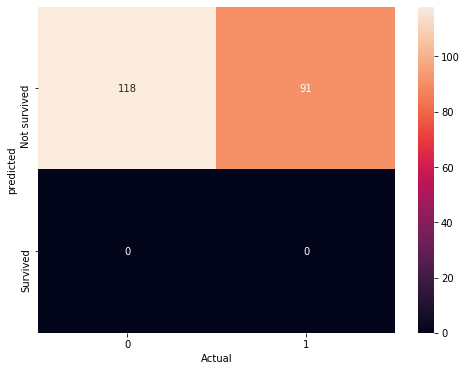

In [16]:
c_mat = confusion_matrix(y_test, y_pred_test)
c_mat_df = pd.DataFrame(c_mat)
c_mat_df.columns = ['Not survived', 'Survived']
c_mat_df = c_mat_df.T
print(c_mat_df)

plt.figure(figsize=(8, 6))
sns.heatmap(c_mat_df, annot=True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('predicted')


In [17]:
scores = classification_report(y_test,y_pred_test)
print(scores)

              precision    recall  f1-score   support

           0       0.56      1.00      0.72       118
           1       0.00      0.00      0.00        91

    accuracy                           0.56       209
   macro avg       0.28      0.50      0.36       209
weighted avg       0.32      0.56      0.41       209



C:\Users\Zhou\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
